### Computational Physics I (WS2024)
**Exercise-Nr.**: 2 <br>
**Name**: Samuel Pucher <br>
**Mat-Nr**: k12007701

-----------------------------------------------------------------

In [9]:
import math 
import numpy as np
import scipy.special
import sympy as sp
import matplotlib.pyplot as plt

-----------------------------------------------------------------

#### Exercise 3.)
In this little exercise, we interpolate two functions $g(x)$ and $f(x)$ via Lagrange polynomials of order $n$ on $[-1,1]$

In [10]:
def f(x):
    return (math.sin(math.pi*x))

def g(x):
    return (1/(1+9*x**2))

Next we define a function which returns he $k$-th Lagrange polynomial $L_k(x)$. We use the same notation as the lecture and symbolic python:

In [11]:
"""
input:
    x: the positions of x (arr)
    k: number of k <=n! (int)
output:
    returns: L_k(x) (double) 
"""
def lagrange_polynom(arr_x, k):
    x = sp.symbols('x')
    L_k = 1 #just for initialization
    
    for j in range(n+1):
        if j != k:
            L_k *= (x - arr_x[j]) / (arr_x[k] - arr_x[j])
    
    return sp.simplify(L_k) #simplifies the result

Ok, so let's test this function, with th equdistant grid from the execise sheet

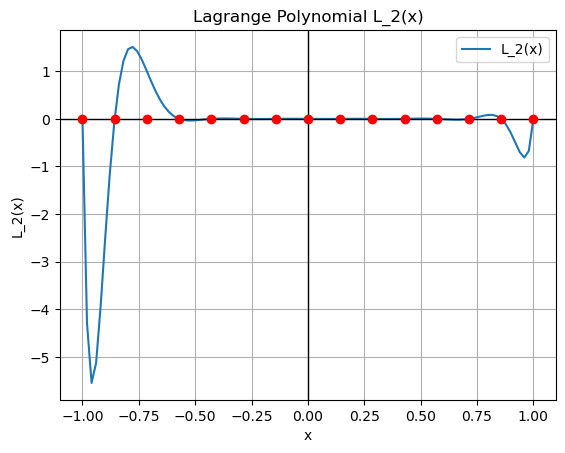

In [12]:
#Params
n = 14
k = 2 # Change this for testing!
x_l = -1
x_u = 1
spatial_res = 100

#Create array of x_i
arr_x = np.linspace(x_l, x_u, (n+1))

# Convert the sympy expression to a numerical function
x = sp.symbols('x')
L_k = lagrange_polynom(arr_x,k)
L_k_func = sp.lambdify(x, L_k, modules='numpy')

# Generate x-values for plotting
x_vals = np.linspace(x_l, x_u, spatial_res)
y_vals = L_k_func(x_vals)
    
# Plot the Lagrange polynomial
plt.plot(x_vals, y_vals, label=f'L_{k}(x)')
    
# Highlight the interpolation points
plt.scatter(arr_x, [0] * len(arr_x), color='red', zorder=5)
    
plt.title(f"Lagrange Polynomial L_{k}(x)")
plt.xlabel("x")
plt.ylabel(f"L_{k}(x)")
plt.grid(True)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()
plt.show()

We can now interpolate thefunctions $f(x)$ and $g(x)$, as show in the lecture

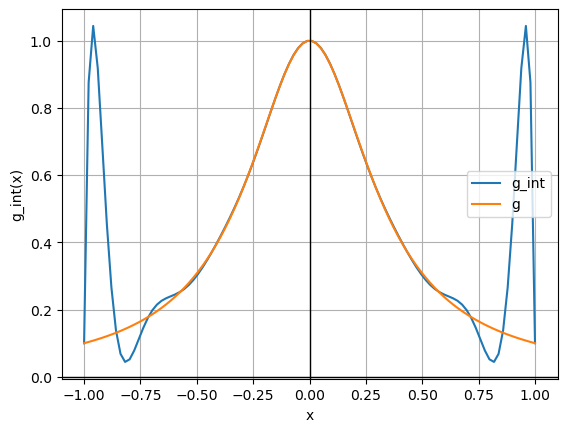

In [13]:
x = sp.symbols('x')
f_inter = g_inter = 0 #initialization

for k in range(0, (n+1)):
    f_inter += lagrange_polynom(arr_x,k)*f(arr_x[k])
    g_inter += lagrange_polynom(arr_x,k)*g(arr_x[k])


#Same procedure as before...
f_inter_func = sp.lambdify(x, f_inter, modules='numpy')
g_inter_func = sp.lambdify(x, g_inter, modules='numpy')
f_vals = f_inter_func(x_vals)
g_vals = g_inter_func(x_vals)
    
# Plot the Lagrange polynomial
plt.plot(x_vals, g_vals, label="g_int")
plt.xlabel("x")
plt.ylabel("g_int(x)")
plt.grid(True)

plt.plot(x_vals, g(x_vals), label="g")


plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()

#plt.plot()
plt.show()

#### Discussion of Exercise 3.)
In this little exercise, the Lagrange polynomials have been used for interpolation. For small $|x|$ this works fine, unfortunately numerical instability starts to appear for points at the boundary. 

#### Exercise 4.)
Now we change the grid to $ x_j = \cos \left( \frac{\pi(j+1/2)}{n+1} \right) , j=0, ..., n$. Let's see what happens

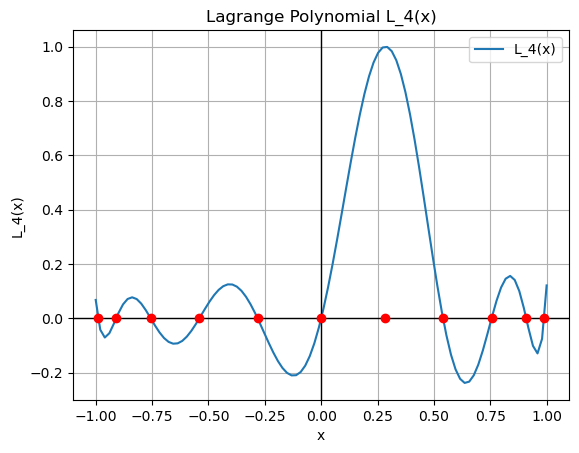

In [14]:
def h(j): 
    return (math.cos(math.pi*(j+0.5)/(n+1)))

#Just copy and paste the code from before
n = 10
k = 4 # Change this for testing!
x_l = -1
x_u = 1
spatial_res = 100

arr_x = [] #Create NEW array of x_i
for i in range(0,(n+1)):
    arr_x.append(h(i))

x = sp.symbols('x')
L_k = lagrange_polynom(arr_x,k)
L_k_func = sp.lambdify(x, L_k, modules='numpy')

# Generate x-values for plotting
x_vals = np.linspace(x_l, x_u, spatial_res)
y_vals = L_k_func(x_vals)
    
# Plot the Lagrange polynomial
plt.plot(x_vals, y_vals, label=f'L_{k}(x)')
    
# Highlight the interpolation points
plt.scatter(arr_x, [0] * len(arr_x), color='red', zorder=5)
    
plt.title(f"Lagrange Polynomial L_{k}(x)")
plt.xlabel("x")
plt.ylabel(f"L_{k}(x)")
plt.grid(True)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()
plt.show()


Let's see what happens ths time, with the new grid :-)

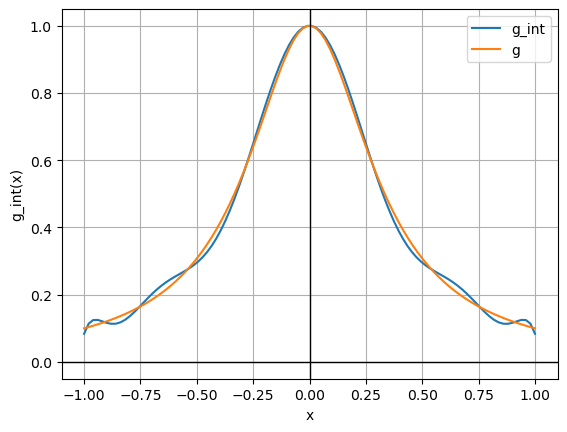

In [15]:
x = sp.symbols('x')
f_inter = g_inter = 0 #initialization

for k in range(0, (n+1)):
    f_inter += lagrange_polynom(arr_x,k)*f(arr_x[k])
    g_inter += lagrange_polynom(arr_x,k)*g(arr_x[k])


#Same procedure as before...
f_inter_func = sp.lambdify(x, f_inter, modules='numpy')
g_inter_func = sp.lambdify(x, g_inter, modules='numpy')
f_vals = f_inter_func(x_vals)
g_vals = g_inter_func(x_vals)
    
# Plot the Lagrange polynomial
plt.plot(x_vals, g_vals, label="g_int")
plt.xlabel("x")
plt.ylabel("g_int(x)")
plt.grid(True)

plt.plot(x_vals, g(x_vals), label="g")


plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()

#plt.plot()
plt.show()

#### Discussion of Exercise 4.)

As we can see, the "instability" for $|x|$ at the boundaries, is reduced when working with this new type of grid. even tho the runtime increases a little bit, the usefulness of the interpolation on the new grid is much higher.
